In [1]:
!pip install --upgrade scikit-learn
!pip install optuna-integration[sklearn]
!pip install phik -q
!pip install yellowbrick
!pip install shap
!pip install imbalanced-learn 
!pip install optuna 
!pip install mlxtend 
!pip install imbalanced-learn 
!pip install --upgrade shap
!pip install --upgrade shap matplotlib
!pip install --upgrade seaborn
!pip install --upgrade scikit-learn optuna
!pip install scikit-learn==1.2.2

In [2]:
import pandas as pd

import numpy as np

from sklearn.ensemble import GradientBoostingClassifier

import matplotlib as plt

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split 

import scipy.stats as stats

from sklearn.metrics import recall_score

from scipy import stats as st

from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score,  
    confusion_matrix,
    roc_auc_score,
    f1_score)

from sklearn.pipeline import Pipeline

from sklearn.svm import SVC 

import phik

import shap


from optuna.integration import OptunaSearchCV 

from itertools import combinations

from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder,   
    StandardScaler,  
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder
                                  )
   
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import make_scorer

from optuna import distributions

from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif


In [4]:
pd.set_option('display.max_columns', 30)
heart_train = pd.read_csv(r"C:\Users\grigr\Desktop\master\heart_train.csv")
heart_test = pd.read_csv(r"C:\Users\grigr\Desktop\master\heart_test.csv")


In [5]:
heart_train.duplicated().sum()

0

In [6]:
heart_test.duplicated().sum() 

0

In [7]:
heart_train.describe()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure,id
count,8685.000000,8685.000000,8685.000000,8685.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8685.000000,8685.000000,8442.000000,8442.000000,8442.000000,8685.000000,8685.000000,8685.000000,8685.000000,8442.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000
mean,4342.000000,0.449958,0.501070,0.050658,0.652097,0.489576,0.902867,0.498342,0.601990,0.503378,1.057455,0.495380,0.501185,5.493367,0.499164,0.496055,0.496774,0.505484,3.508292,0.503737,0.346920,0.227339,0.048159,0.036689,0.450295,0.497634,4831.210823
std,2507.287877,0.231174,0.284716,0.023453,0.476333,0.499921,0.296157,0.500027,0.489517,0.284810,0.866645,0.500008,0.500028,2.867862,0.285340,0.284698,0.282561,0.286320,2.281772,0.328061,0.476017,0.076635,0.075531,0.060157,0.170184,0.171830,2782.585625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2171.000000,0.258427,0.267857,0.034830,0.000000,0.000000,1.000000,0.000000,0.000000,0.263286,0.000000,0.000000,0.000000,3.000000,0.255875,0.251922,0.254190,0.263636,2.000000,0.166667,0.000000,0.227018,0.048229,0.036512,0.303226,0.348837,2425.000000
50%,4342.000000,0.460674,0.499780,0.050412,1.000000,0.000000,1.000000,0.000000,1.000000,0.502110,1.000000,0.000000,1.000000,5.000000,0.499920,0.494889,0.494774,0.503603,3.000000,0.500000,0.000000,0.227018,0.048229,0.036512,0.445161,0.500000,4837.000000
75%,6513.000000,0.640449,0.746429,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.748709,2.000000,1.000000,1.000000,8.000000,0.744623,0.741036,0.736974,0.750649,6.000000,0.833333,1.000000,0.227018,0.048229,0.036512,0.600000,0.651163,7242.000000
max,8684.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9650.000000


In [8]:
heart_test.describe()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure,id
count,966.00000,966.000000,966.000000,966.000000,935.000000,935.000000,935.000000,935.000000,935.000000,966.000000,966.000000,935.000000,935.000000,935.000000,966.000000,966.000000,966.000000,966.000000,935.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,482.50000,0.452916,0.488181,0.051644,0.656684,0.481283,0.898396,0.516578,0.583957,0.490706,1.053830,0.494118,0.488770,5.332620,0.506715,0.484408,0.476796,0.486688,3.443850,0.512571,0.224127,0.048855,0.034926,0.447172,0.496822,4769.160455
std,279.00448,0.231068,0.282039,0.035502,0.475070,0.499917,0.302289,0.499993,0.493165,0.284902,0.884642,0.500233,0.500141,2.858466,0.287826,0.273879,0.291987,0.284534,2.302778,0.322292,0.065270,0.079742,0.053855,0.171837,0.173935,2818.815407
min,0.00000,0.044944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000,0.000000,0.000000,1.000000,0.001187,0.003351,0.002598,0.000000,0.000000,0.000000,0.029644,0.000000,0.000194,0.012903,0.116279,0.000000
25%,241.25000,0.247191,0.243750,0.036664,0.000000,0.000000,1.000000,0.000000,0.000000,0.243431,0.000000,0.000000,0.000000,3.000000,0.258713,0.261446,0.217527,0.249675,1.000000,0.166667,0.227018,0.048229,0.036512,0.296774,0.348837,2275.750000
50%,482.50000,0.460674,0.499780,0.050412,1.000000,0.000000,1.000000,1.000000,1.000000,0.502110,1.000000,0.000000,0.000000,5.000000,0.501327,0.492015,0.471185,0.488961,3.000000,0.500000,0.227018,0.048229,0.036512,0.445161,0.488372,4769.500000
75%,723.75000,0.640449,0.710714,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.734425,2.000000,1.000000,1.000000,8.000000,0.759591,0.705371,0.720503,0.718182,5.000000,0.833333,0.227018,0.048229,0.036512,0.600000,0.639535,7206.000000
max,965.00000,0.853933,0.996429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998938,3.000000,1.000000,1.000000,10.000000,0.999033,0.998885,0.999496,0.998701,7.000000,1.000000,0.750988,1.000000,0.970871,0.741935,0.790698,9644.000000


**Используя describe(), я могу предположить, что признаки уже отмасштабированы**

Минимальные и максимальные значения количественных признаков имеют 0 и 1

In [9]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

In [10]:
heart_train.columns = heart_train.columns.str.lower() # приводим колонки к нижнему регистру
bin_col = [
    'diabetes','family history','smoking','obesity', 'alcohol consumption', 'previous heart problems',
'medication use', 'heart attack risk (binary)' ] # определяю бинарные признаки

heart_test.columns = heart_test.columns.str.lower()
bin_col_test = [
    'diabetes','family history','smoking','obesity', 'alcohol consumption', 'previous heart problems',
'medication use']

In [11]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed: 0                       966 non-null    int64  
 1   age                              966 non-null    float64
 2   cholesterol                      966 non-null    float64
 3   heart rate                       966 non-null    float64
 4   diabetes                         935 non-null    float64
 5   family history                   935 non-null    float64
 6   smoking                          935 non-null    float64
 7   obesity                          935 non-null    float64
 8   alcohol consumption              935 non-null    float64
 9   exercise hours per week          966 non-null    float64
 10  diet                             966 non-null    int64  
 11  previous heart problems          935 non-null    float64
 12  medication use        

**Видно, что пропуски не превышают более 10% всего датасета. Бинарные и категориальные допустимо заполнить модой. Количественные заполню медианным значением, чтобы быть более устойчивым к выбросам в данных**

### *Обработка бинарных данных на тестовой выборке*

In [12]:
display(heart_test['gender'].unique())

array(['Male', 'Female', '1.0', '0.0'], dtype=object)

In [13]:
heart_test['gender'] = heart_test['gender'].apply(lambda x: 
    1 if x in ['Male', '1.0'] else 0
)

In [17]:
for column in bin_col_test:
    if heart_test[column].isnull().mean() <0.1:
        mode_value_test =  heart_test[column].mode()[0]
        heart_test[column] = heart_test[column].fillna(mode_value_test)

In [18]:
for column in bin_col_test:
    unique_values_test = heart_test[column].unique()
    display(f'Уникальные значения в столбце {column}: {unique_values_test}')

'Уникальные значения в столбце diabetes: [0. 1.]'

'Уникальные значения в столбце family history: [1. 0.]'

'Уникальные значения в столбце smoking: [1. 0.]'

'Уникальные значения в столбце obesity: [1. 0.]'

'Уникальные значения в столбце alcohol consumption: [1. 0.]'

'Уникальные значения в столбце previous heart problems: [0. 1.]'

'Уникальные значения в столбце medication use: [0. 1.]'

In [19]:
for column in bin_col_test:
    heart_test[column] = heart_test[column].astype('int')

In [20]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed: 0                       966 non-null    int64  
 1   age                              966 non-null    float64
 2   cholesterol                      966 non-null    float64
 3   heart rate                       966 non-null    float64
 4   diabetes                         966 non-null    int32  
 5   family history                   966 non-null    int32  
 6   smoking                          966 non-null    int32  
 7   obesity                          966 non-null    int32  
 8   alcohol consumption              966 non-null    int32  
 9   exercise hours per week          966 non-null    float64
 10  diet                             966 non-null    int64  
 11  previous heart problems          966 non-null    int32  
 12  medication use        

### *Обработка бинарных данных на тренировочной выборке*

In [21]:
display(heart_train['gender'].unique()) # следует закодировать признак, заполнить пропуски и перевести в численный тип

array(['Male', 'Female', '1.0', '0.0'], dtype=object)

In [22]:
heart_train['gender'] = heart_train['gender'].apply(lambda x: 
    1 if x in ['Male', '1.0'] else 0
)



In [23]:
for column in bin_col:
    if heart_train[column].isnull().mean() <0.1:
        mode_value =  heart_train[column].mode()[0]
        heart_train[column] = heart_train[column].fillna(mode_value)

In [24]:
for column in bin_col:
    unique_values = heart_train[column].unique()
    display(f'Уникальные значения в столбце {column}: {unique_values}')

'Уникальные значения в столбце diabetes: [1. 0.]'

'Уникальные значения в столбце family history: [1. 0.]'

'Уникальные значения в столбце smoking: [1. 0.]'

'Уникальные значения в столбце obesity: [1. 0.]'

'Уникальные значения в столбце alcohol consumption: [1. 0.]'

'Уникальные значения в столбце previous heart problems: [1. 0.]'

'Уникальные значения в столбце medication use: [0. 1.]'

'Уникальные значения в столбце heart attack risk (binary): [0. 1.]'

In [25]:
# heart_train[bin_col] = heart_train[bin_col].astype('int')
for column in bin_col:
    heart_train[column] = heart_train[column].astype('int')
    

### Исследовательский анализ тестовой выборки

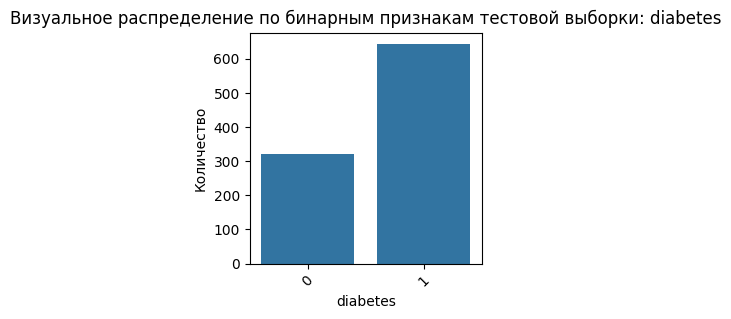

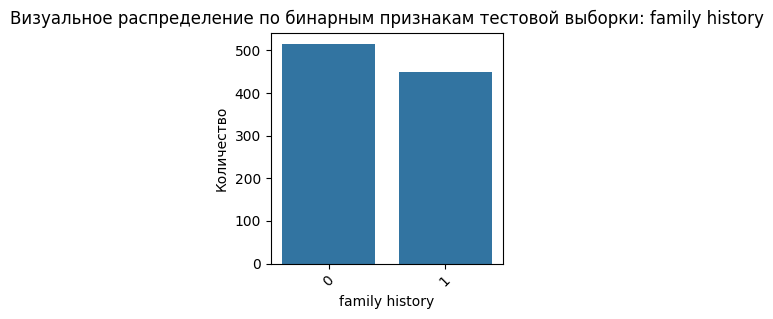

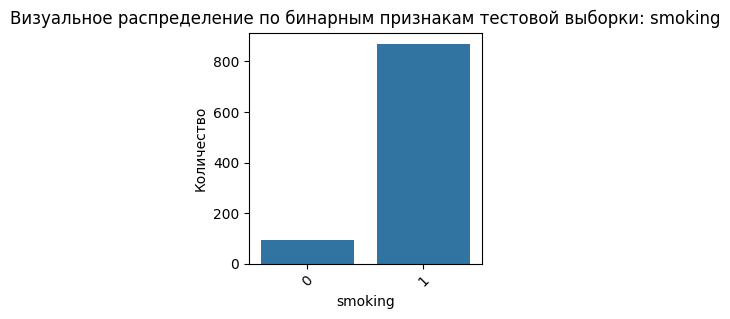

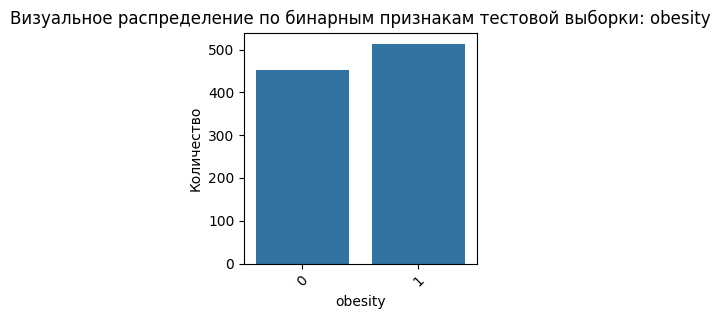

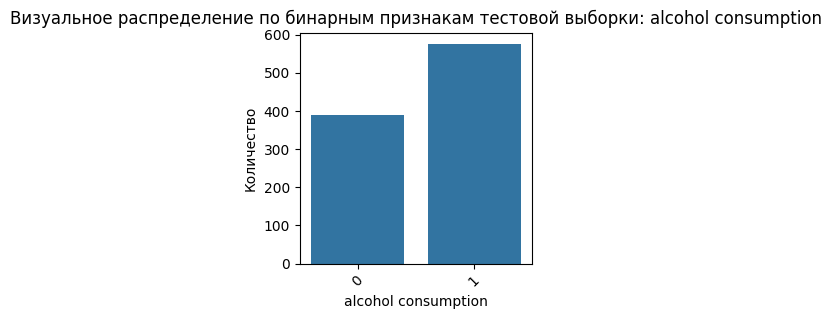

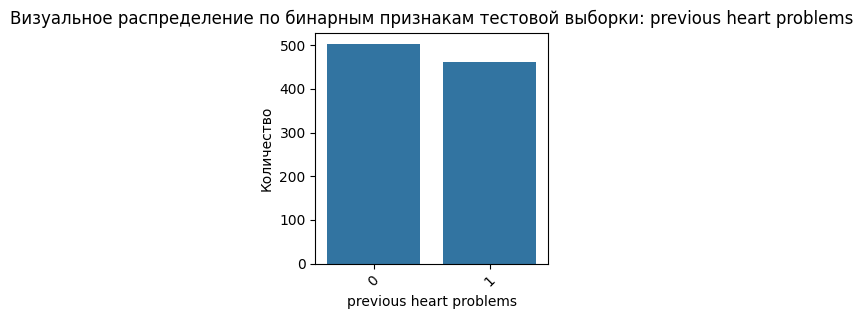

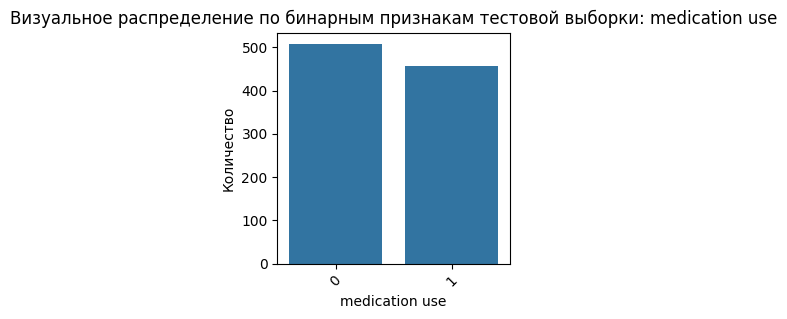

In [26]:
for column in bin_col_test:
    plt.figure(figsize=(3, 3))
    sns.countplot(data = heart_test,  x=column)
    plt.xticks(rotation=45)
    plt.title(f'Визуальное распределение по бинарным признакам тестовой выборки: {column}') 
    plt.xlabel(column)  
    plt.ylabel('Количество') 
    plt.show()  

### Исследовательский анализ тренировочной выборки

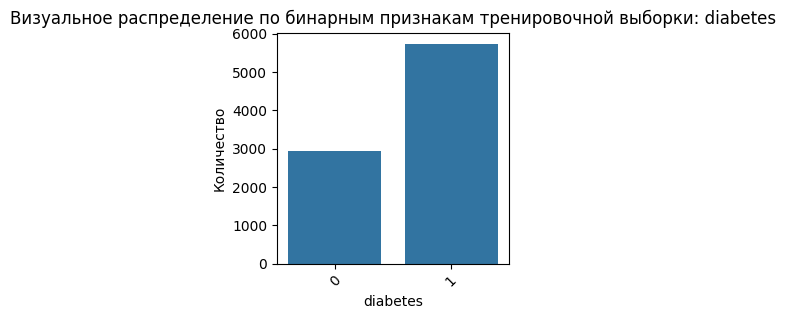

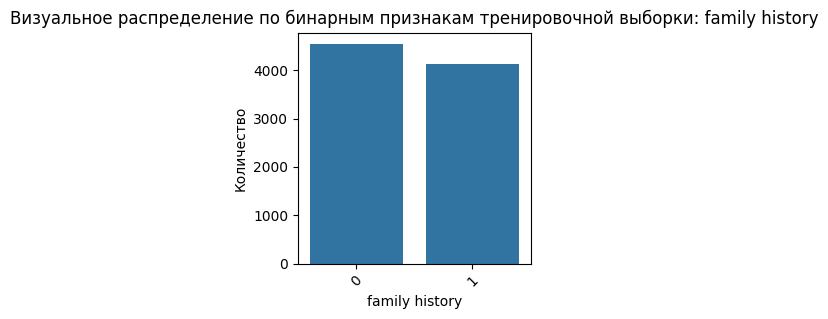

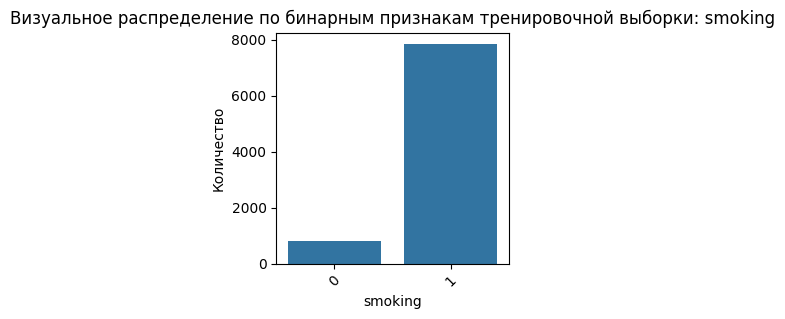

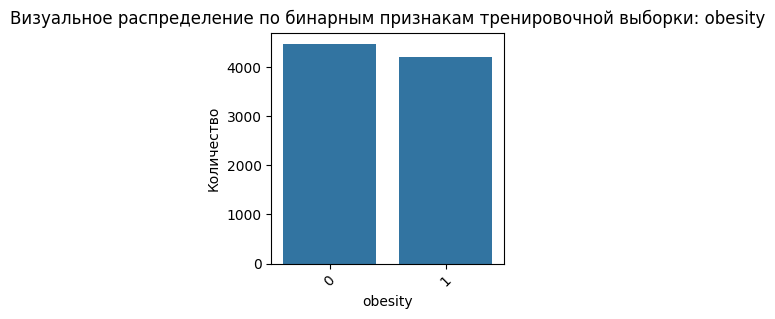

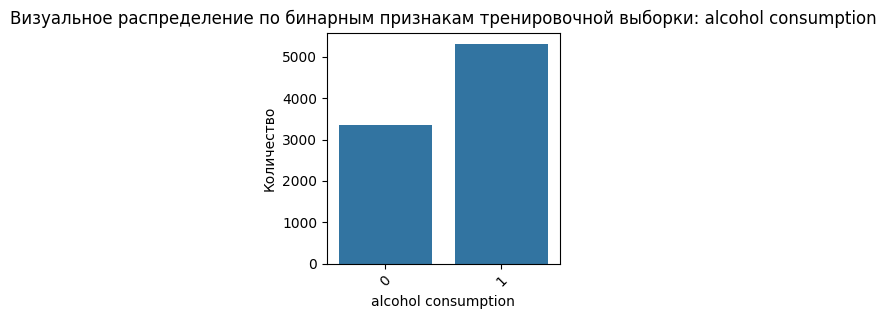

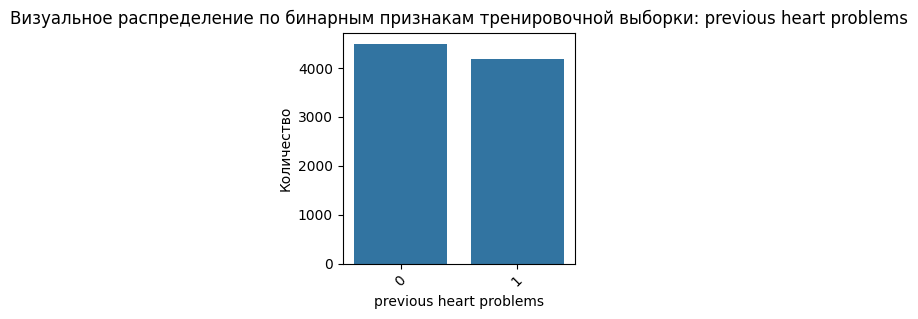

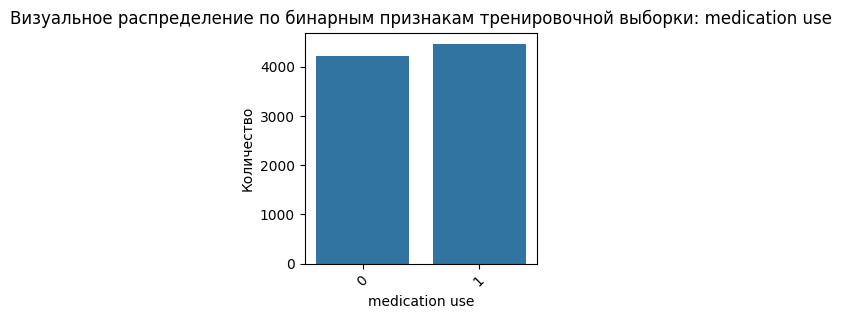

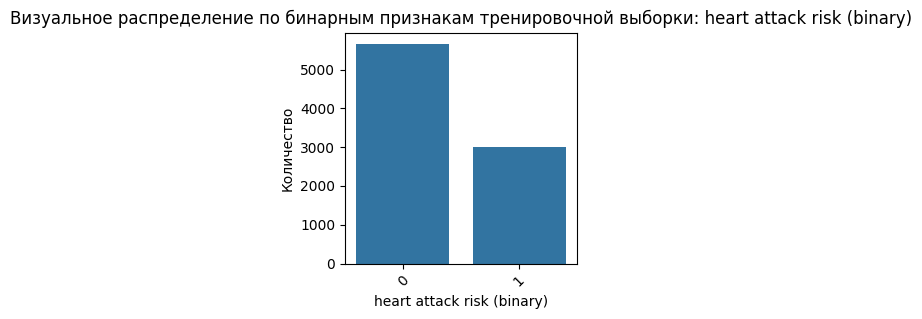

In [27]:
for column in bin_col:
    plt.figure(figsize=(3, 3))
    sns.countplot(data = heart_train,  x=column)
    plt.xticks(rotation=45)
    plt.title(f'Визуальное распределение по бинарным признакам тренировочной выборки: {column}') 
    plt.xlabel(column)  
    plt.ylabel('Количество') 
    plt.show()  

In [28]:
num_col_test = ['age',
'cholesterol', 'heart rate', 'exercise hours per week',
'sedentary hours per day', 'income', 'bmi',	'triglycerides', 'physical activity days per week','sleep hours per day','blood sugar',
'ck-mb' ,'troponin',
'systolic blood pressure',	'diastolic blood pressure'
]

In [29]:
heart_test['physical activity days per week'] = heart_test['physical activity days per week'].fillna(heart_test['physical activity days per week'].median())


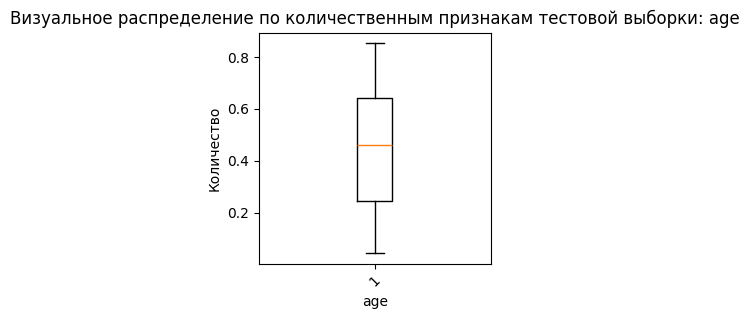

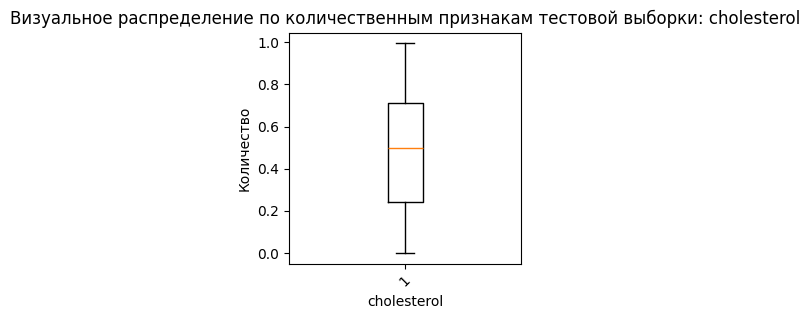

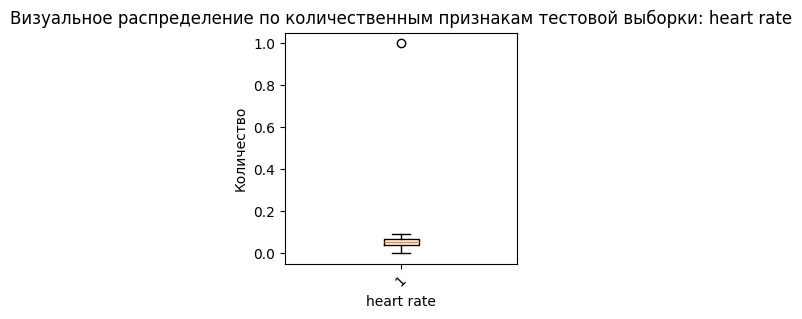

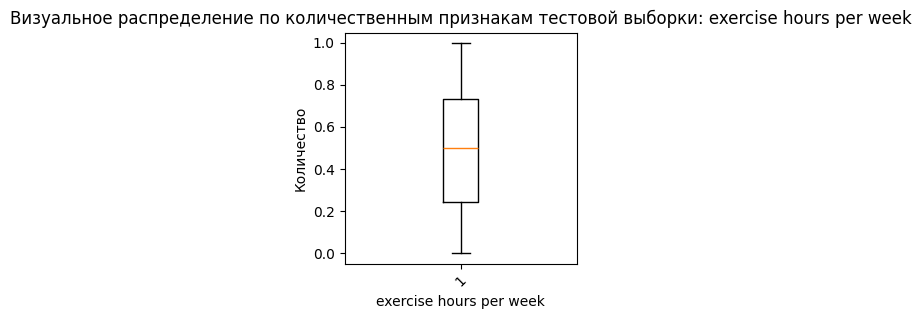

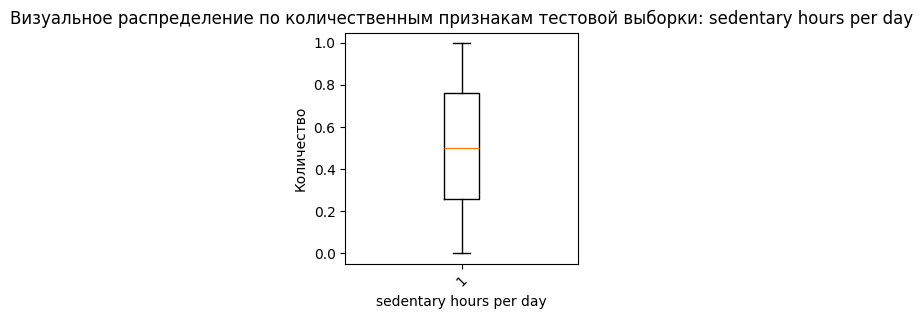

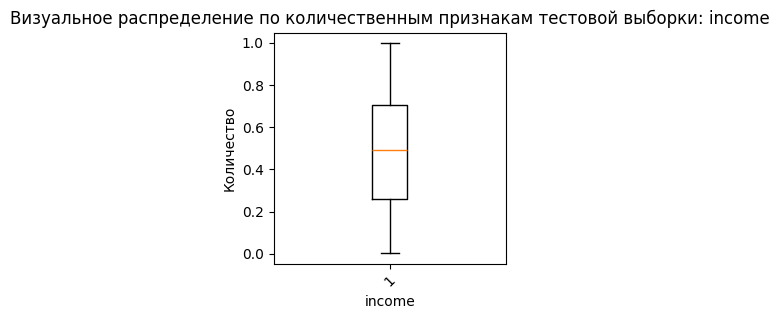

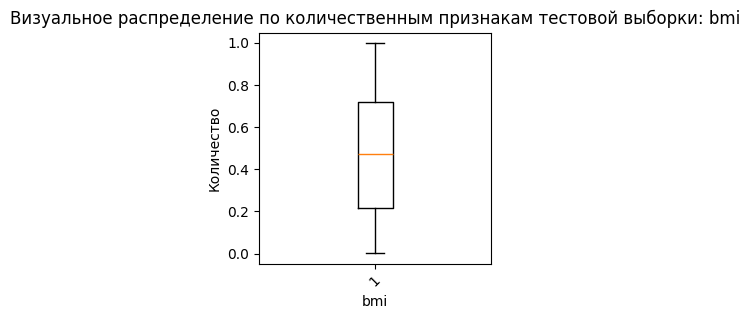

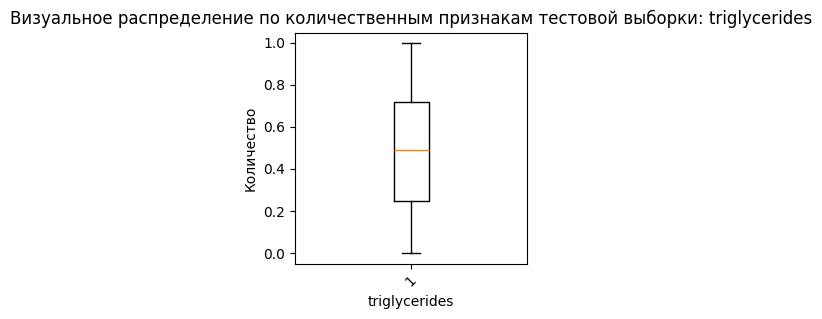

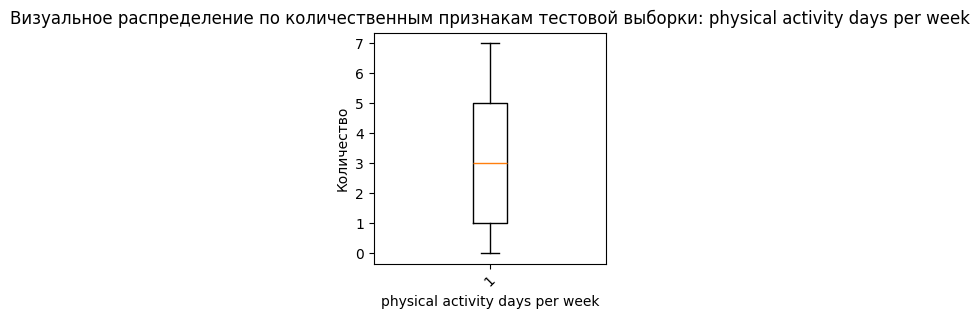

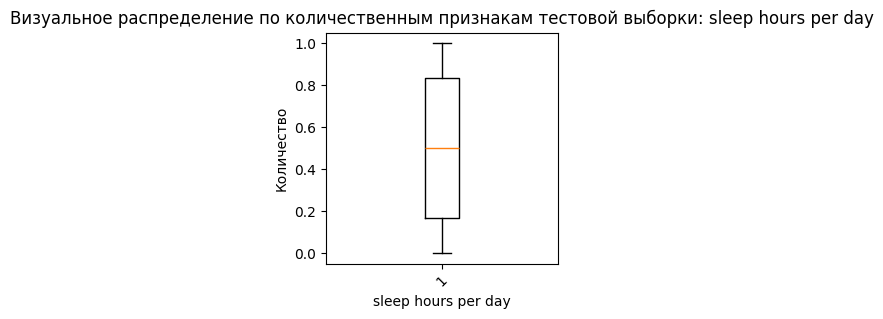

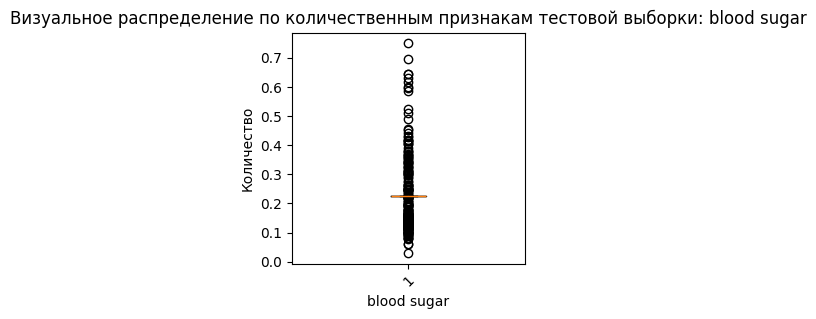

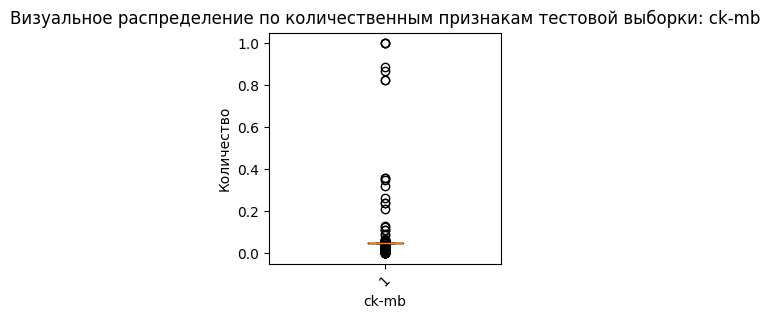

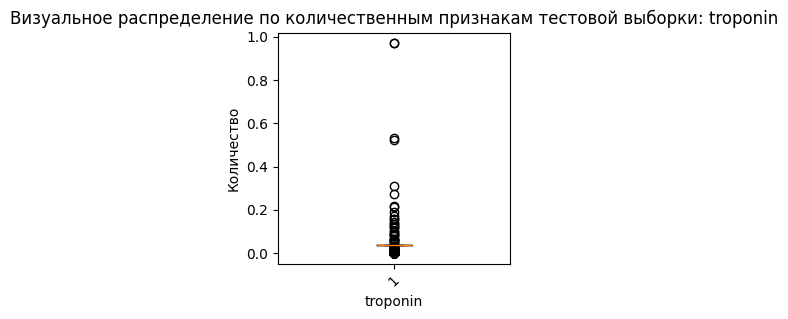

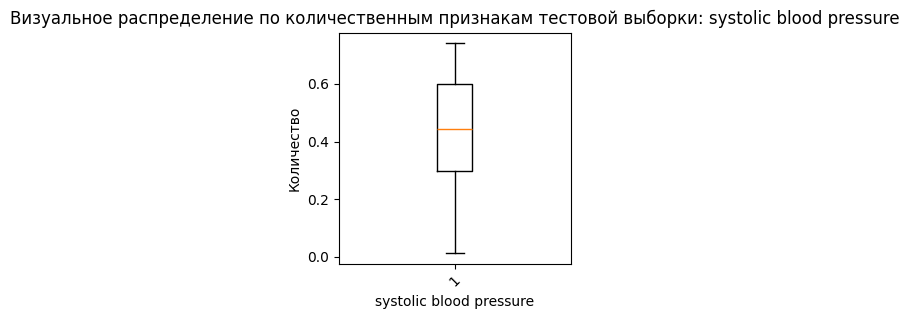

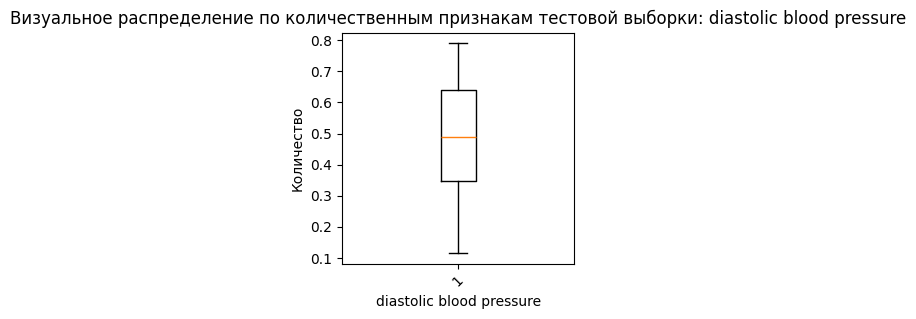

In [30]:
for i in num_col_test:
    plt.figure(figsize=(3, 3))
    plt.boxplot(data = heart_test,  x=i)
    plt.xticks(rotation=45)
    plt.title(f'Визуальное распределение по количественным признакам тестовой выборки: {i}') 
    plt.xlabel(i)  
    plt.ylabel('Количество') 
    plt.show()  

In [31]:
heart_test['stress level'] = heart_test['stress level'].fillna(heart_test['stress level'].median())
heart_test['stress level'] = heart_test['stress level'].astype('int')

cat_col_test = ['stress level','diet']

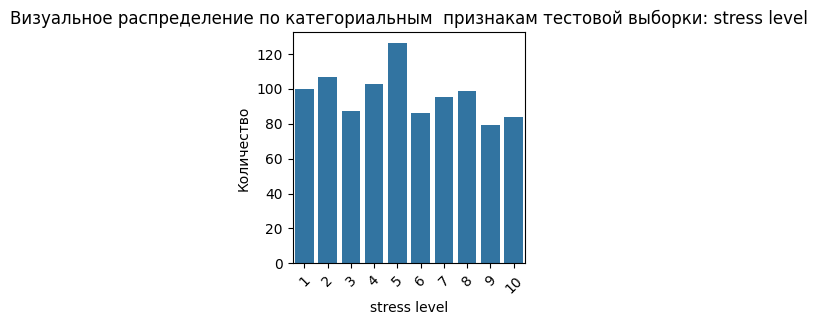

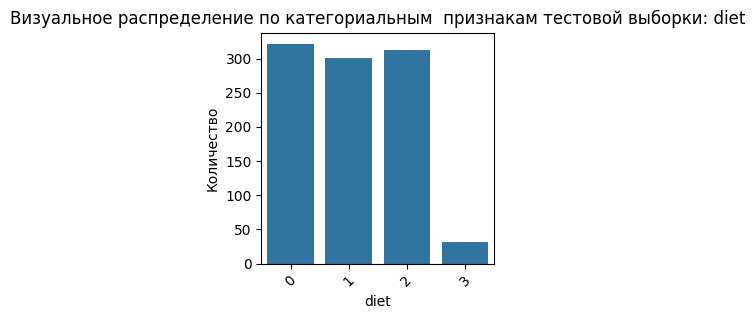

In [32]:
for i in cat_col_test:
    plt.figure(figsize=(3, 3))
    sns.countplot(data = heart_test,  x=i)
    plt.xticks(rotation=45)
    plt.title(f'Визуальное распределение по категориальным  признакам тестовой выборки: {i}') 
    plt.xlabel(i)  
    plt.ylabel('Количество') 
    plt.show()  

In [33]:
num_col = ['age',
'cholesterol', 'heart rate', 'exercise hours per week',
'sedentary hours per day', 'income', 'bmi',	'triglycerides', 'physical activity days per week','sleep hours per day','blood sugar',
'ck-mb' ,'troponin',
'systolic blood pressure',	'diastolic blood pressure'
]

In [34]:
# Заполнение пропусков медианой для колонки 'physical activity days per week'
heart_train['physical activity days per week'] = heart_train['physical activity days per week'].fillna(heart_train['physical activity days per week'].median())


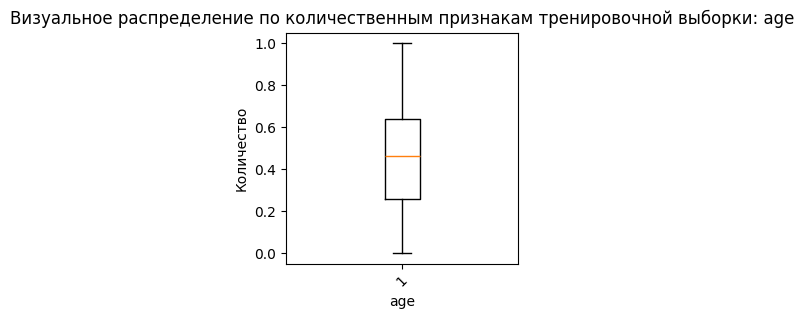

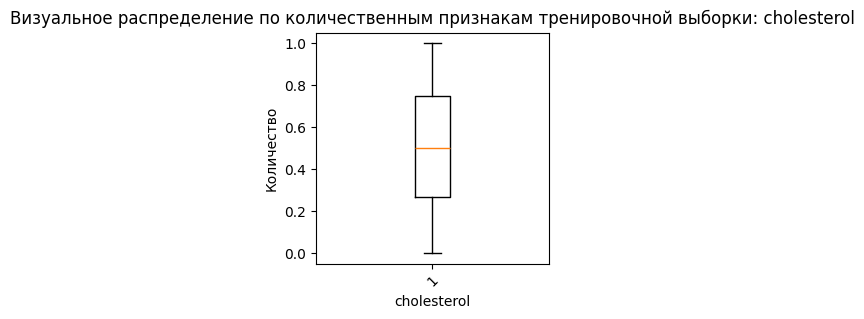

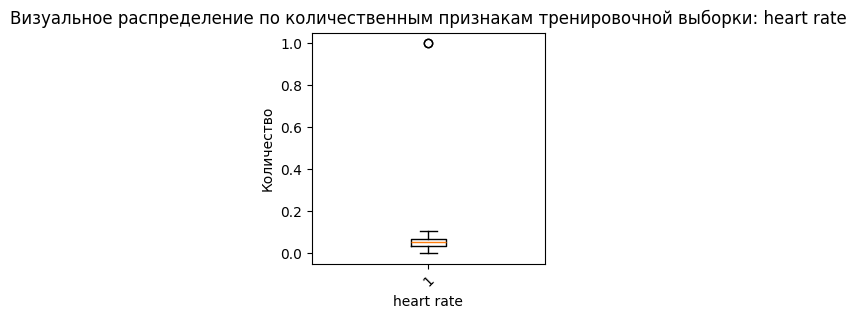

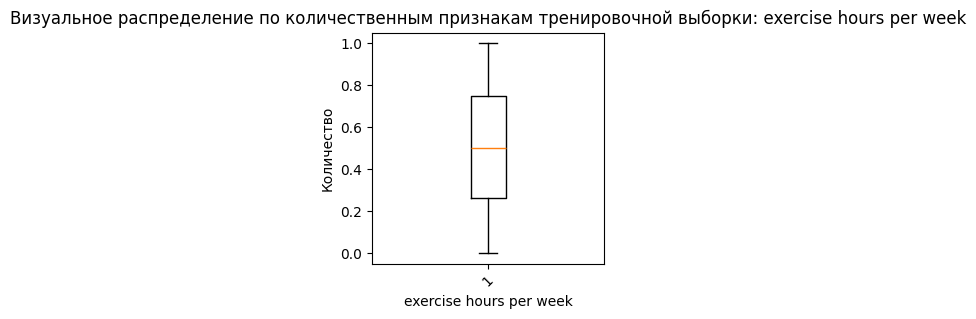

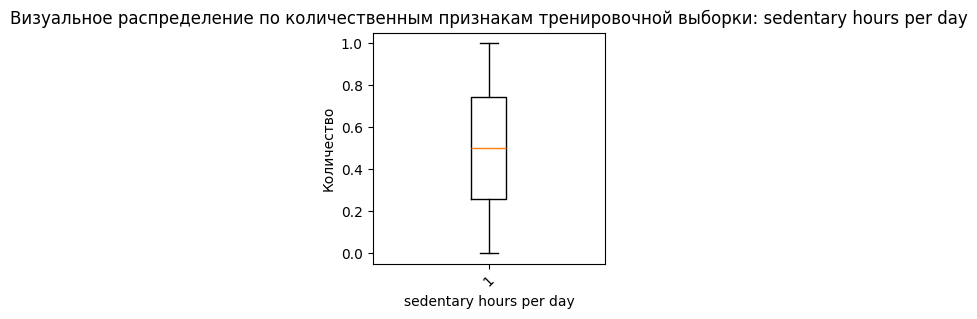

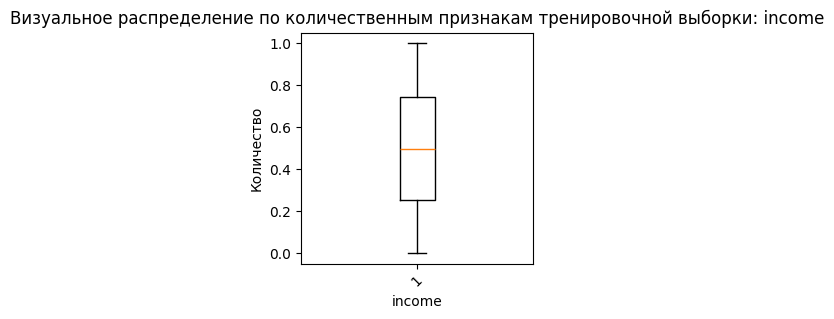

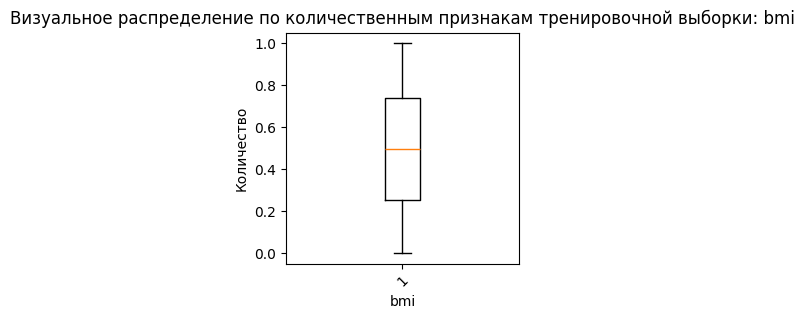

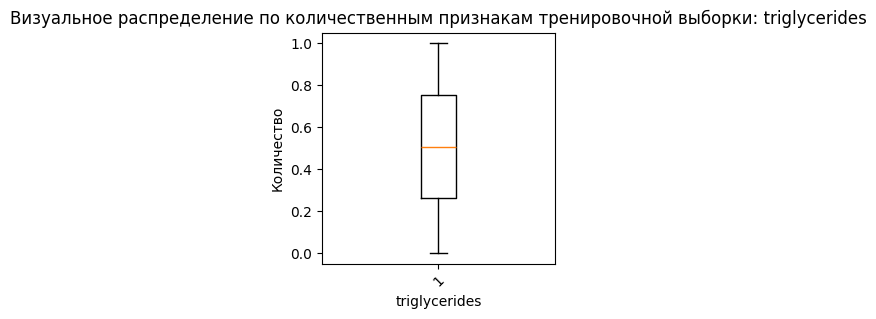

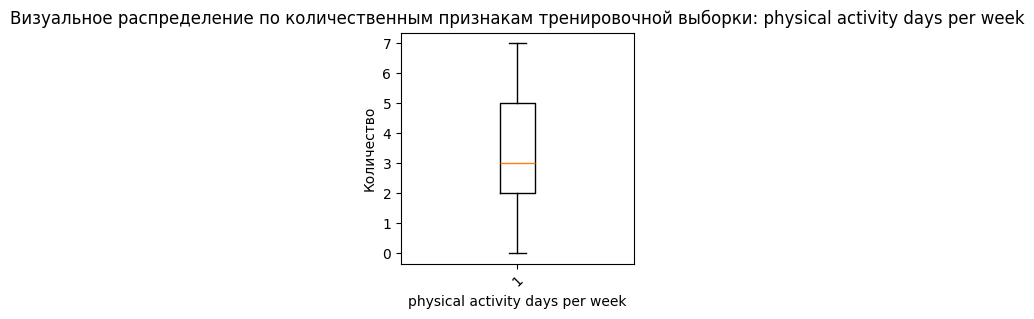

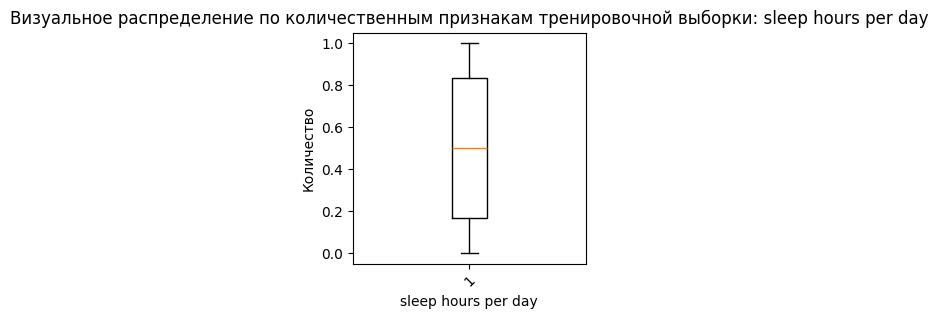

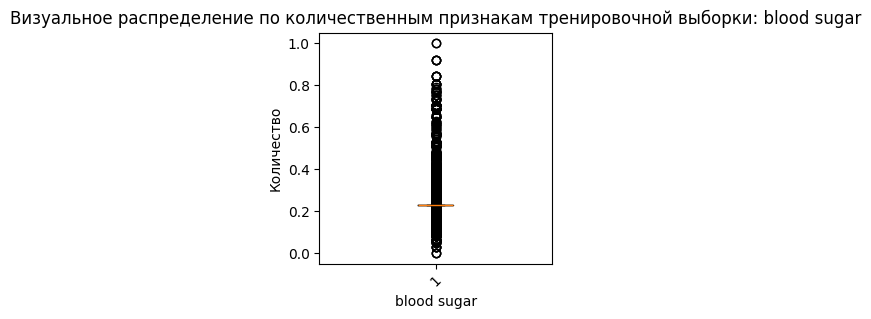

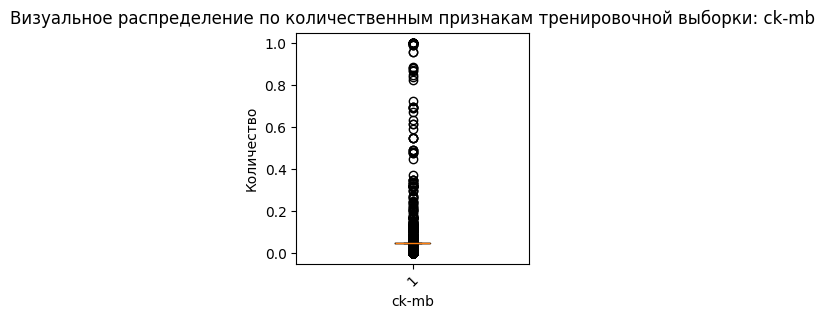

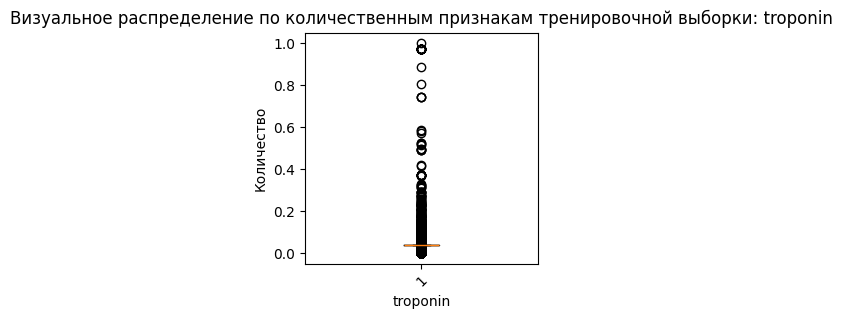

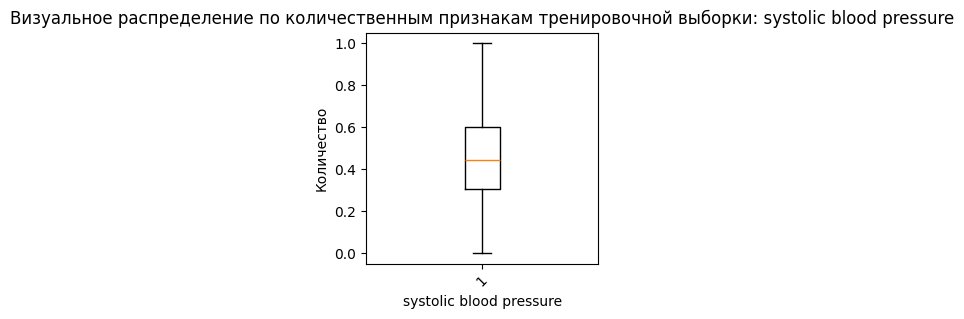

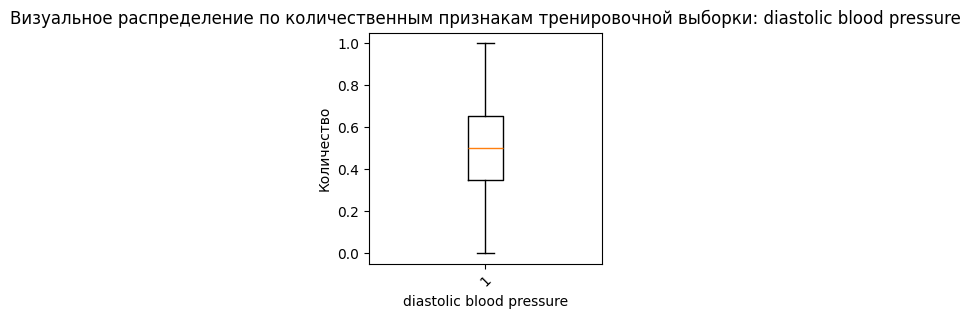

In [35]:
for i in num_col:
    plt.figure(figsize=(3, 3))
    plt.boxplot(data = heart_train,  x=i)
    plt.xticks(rotation=45)
    plt.title(f'Визуальное распределение по количественным признакам тренировочной выборки: {i}') 
    plt.xlabel(i)  
    plt.ylabel('Количество') 
    plt.show()  

In [36]:
heart_train['stress level'] = heart_train['stress level'].fillna(heart_train['stress level'].median())
heart_train['stress level'] = heart_train['stress level'].astype('int')

In [37]:
cat_col = ['stress level','diet']

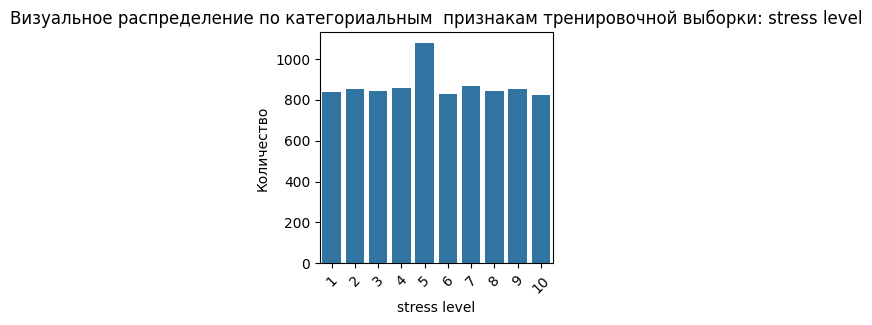

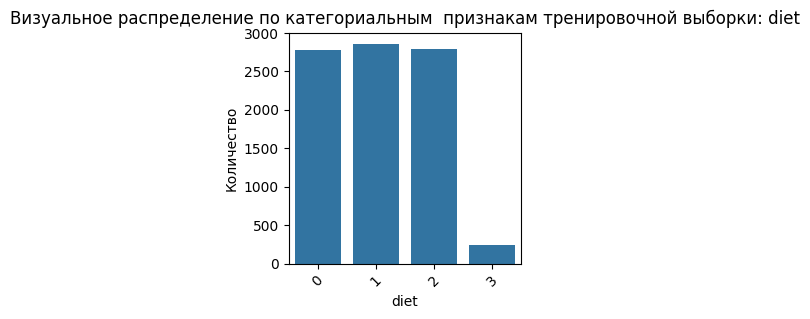

In [38]:
for i in cat_col:
    plt.figure(figsize=(3, 3))
    sns.countplot(data = heart_train,  x=i)
    plt.xticks(rotation=45)
    plt.title(f'Визуальное распределение по категориальным  признакам тренировочной выборки: {i}') 
    plt.xlabel(i)  
    plt.ylabel('Количество') 
    plt.show()  

**Бинарные признаки обработы от пропусков, заполнены модой, и приведены в корректный тип данных.
Построенны графики:**

*1)Большинство пациентов имеют вредные привычки*

*2)Большинство пациентов не имеют высокого риска для инфаркта*



Видно, что данные имеют выбросы. Однако данные масштаибированы, скорее всего по MinMaxscaler. Так как значения признаков находятся в разных диапазонах.
Например: возраст и единица ммоль сахар в крови. 

Может быть стоит удалить выброс из heart_rate и присвоить категоризацию: ck-mb,troponin. Видно как значения разрываются на боксплоте. Пострю матрицу корреляции, создам признак категоризации. Посмотрим как это отразиться на моделе


Можно отметить, что данные распределены равномерно между выборками. 

Я определяю признаки : diet, stress level, как категориальные, а не количественные. Так как цифры вполне можно заменить словами.

Например диета:
0) нет 1) легкая 2) средняя 3) стрессовая
Это касается и уровня стресса.

Интересно, правильное ли это решение...


In [39]:
le = LabelEncoder()
heart_train['heart attack risk (binary)'] = le.fit_transform(heart_train['heart attack risk (binary)'])



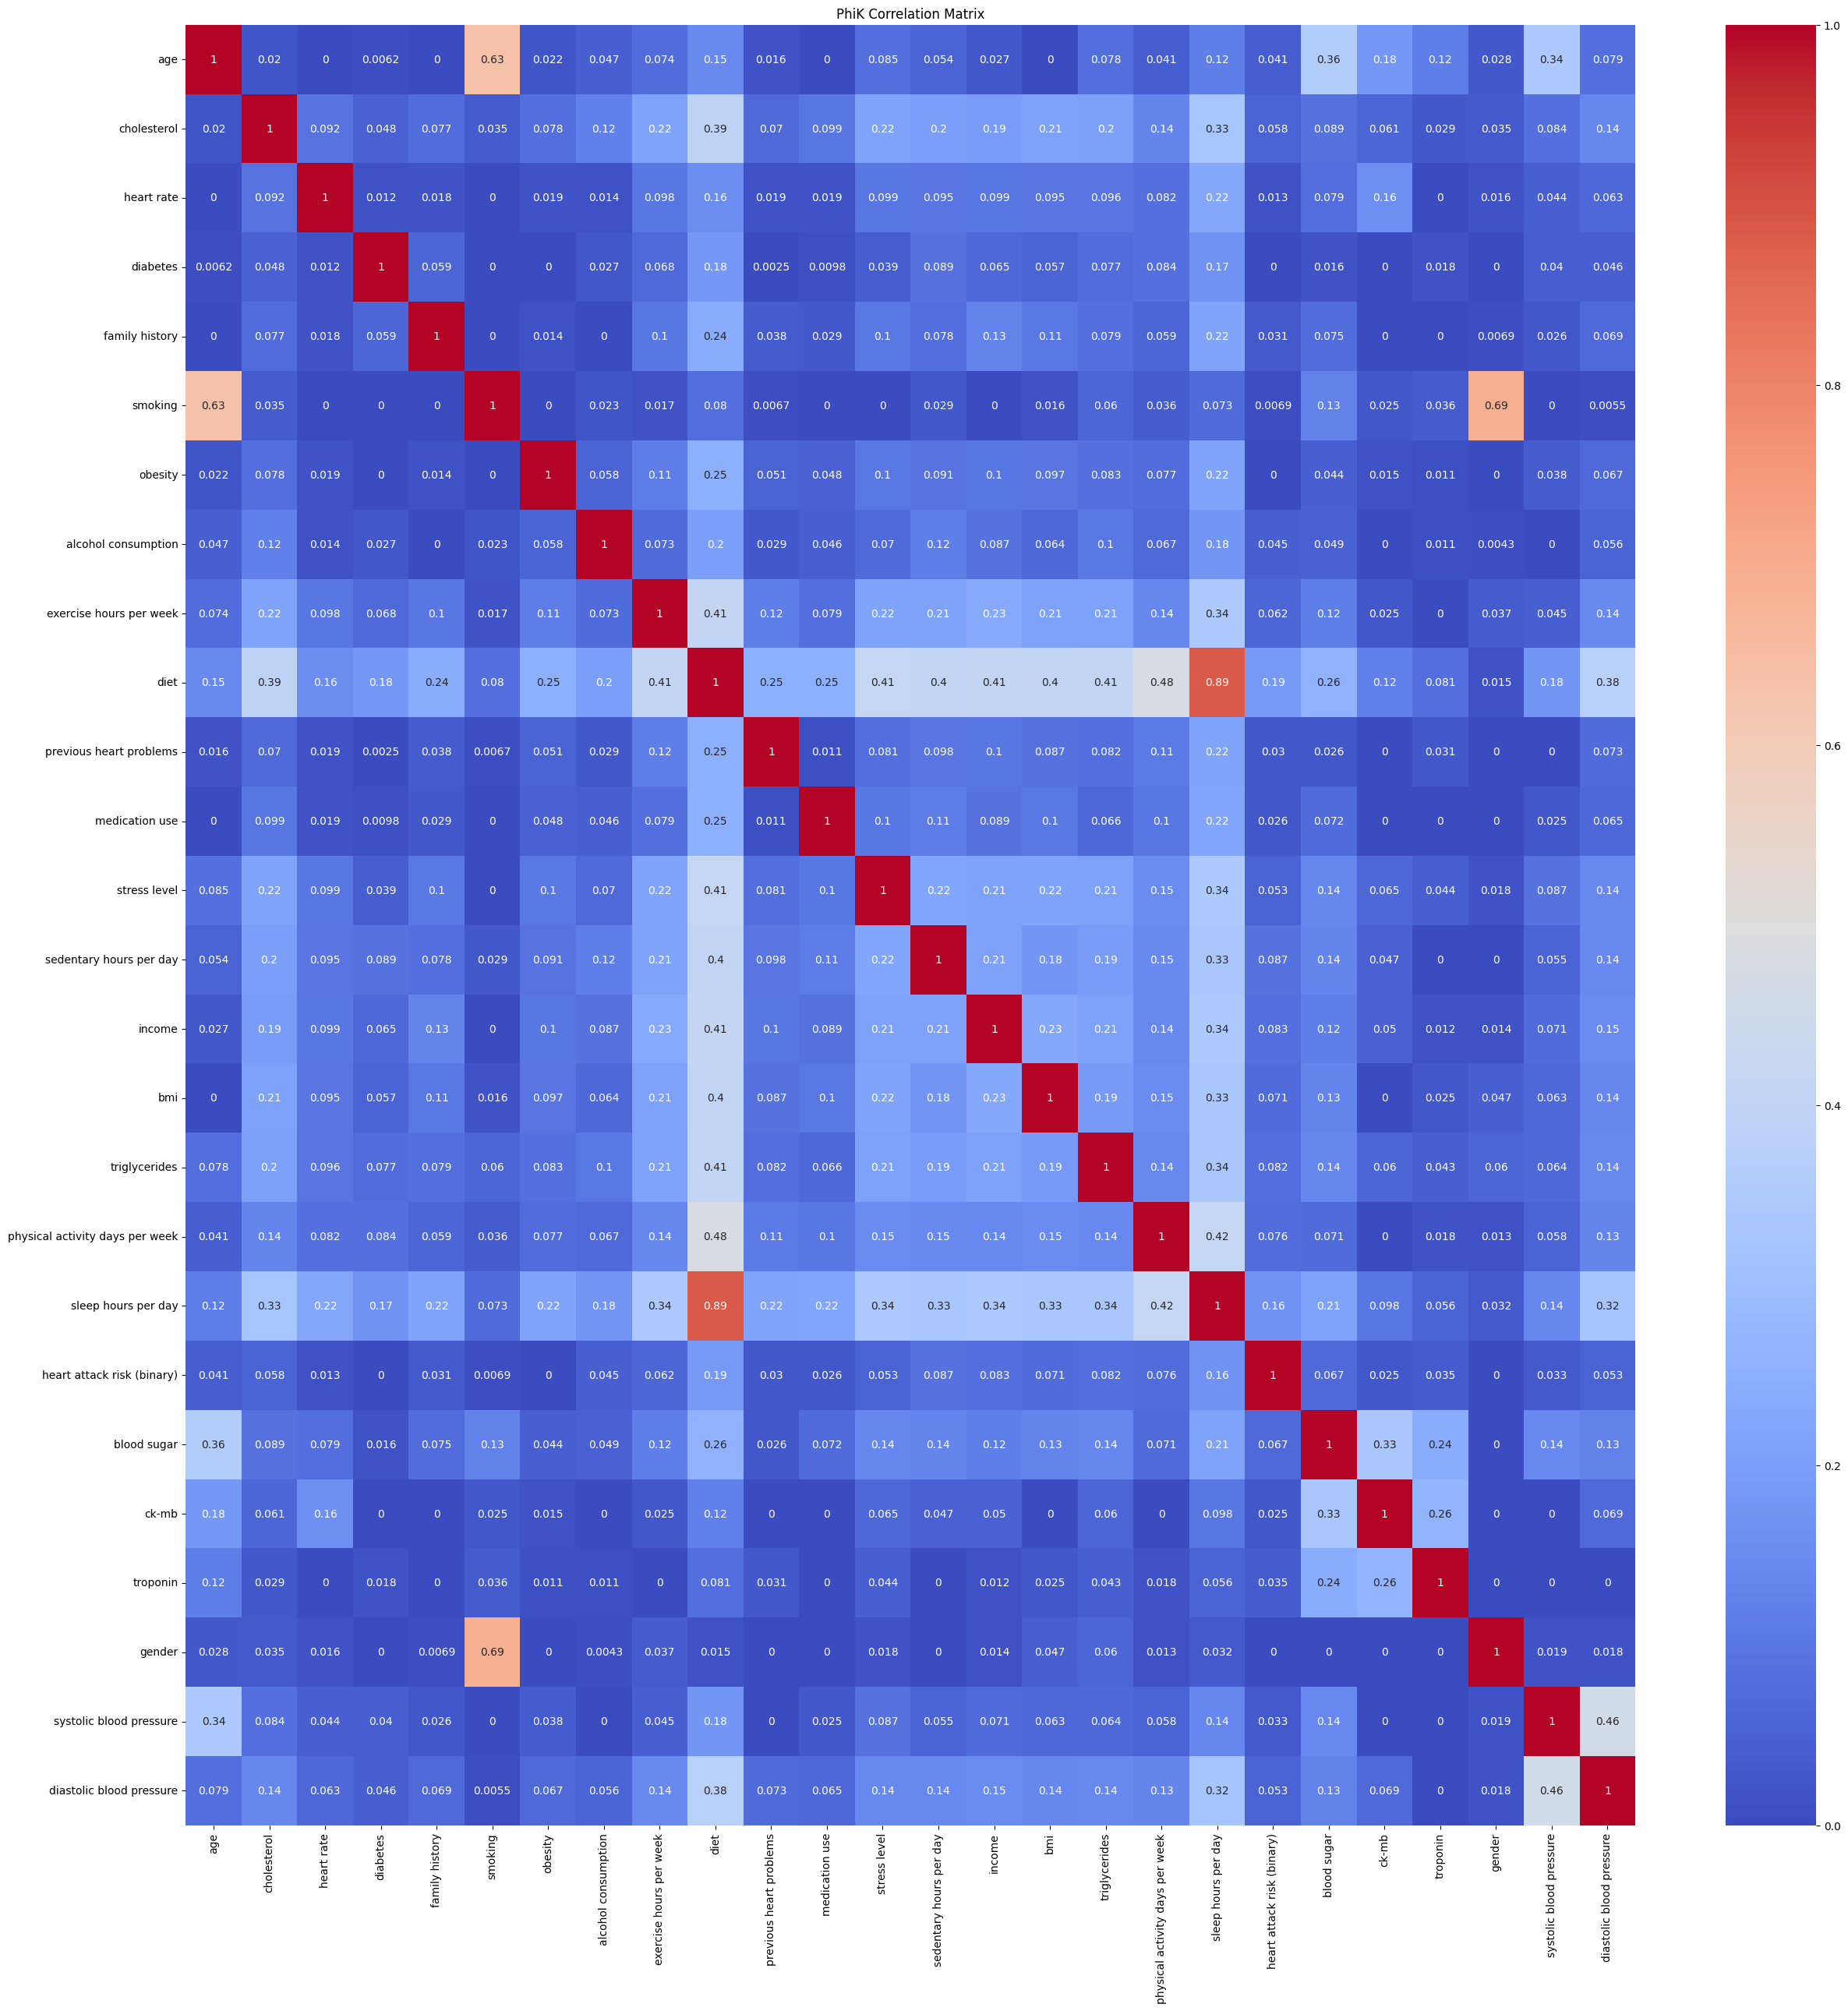

In [40]:

phik_matrix_preview = heart_train.drop(['id','unnamed: 0'], axis =1).phik_matrix(interval_cols= heart_train.columns)
plt.figure(figsize=(30, 30))  
sns.heatmap(phik_matrix_preview, annot=True, cmap='coolwarm')
plt.title('PhiK Correlation Matrix') 
plt.show() 

**Признаки между собой, практически, не коррелируют. Попробую удалить выброс из heart_rate и присвоить категоризацию: ck-mb,troponin**

<Axes: >

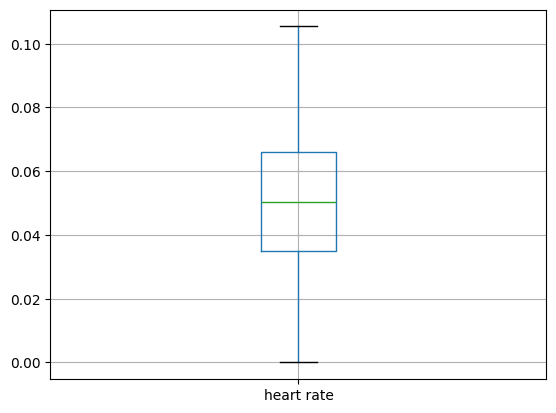

In [41]:
heart_train['heart rate'] = heart_train['heart rate'].where(heart_train['heart rate'] < 0.9)
heart_train.boxplot('heart rate')

<Axes: >

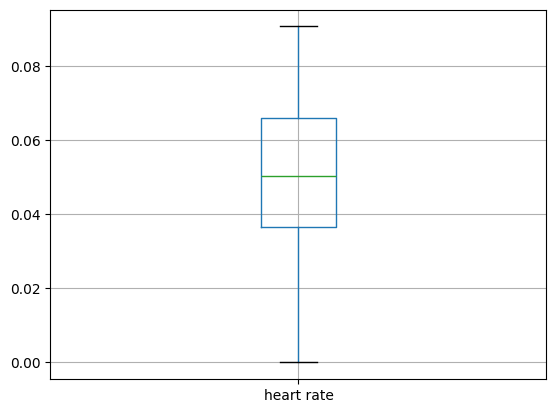

In [42]:
heart_test['heart rate'] = heart_test['heart rate'].where(heart_test['heart rate'] < 0.9)
heart_test.boxplot('heart rate')

In [43]:
heart_train['ck_mb_cat'] = heart_train['ck-mb'].apply(lambda x: 
    0 if x < 0.4 else 
    1 if 0.4 <= x < 0.8 else 
    2 if x > 0.8 else 
    1                                                  
                                               
)# попытка присвоить категорию количественному признака

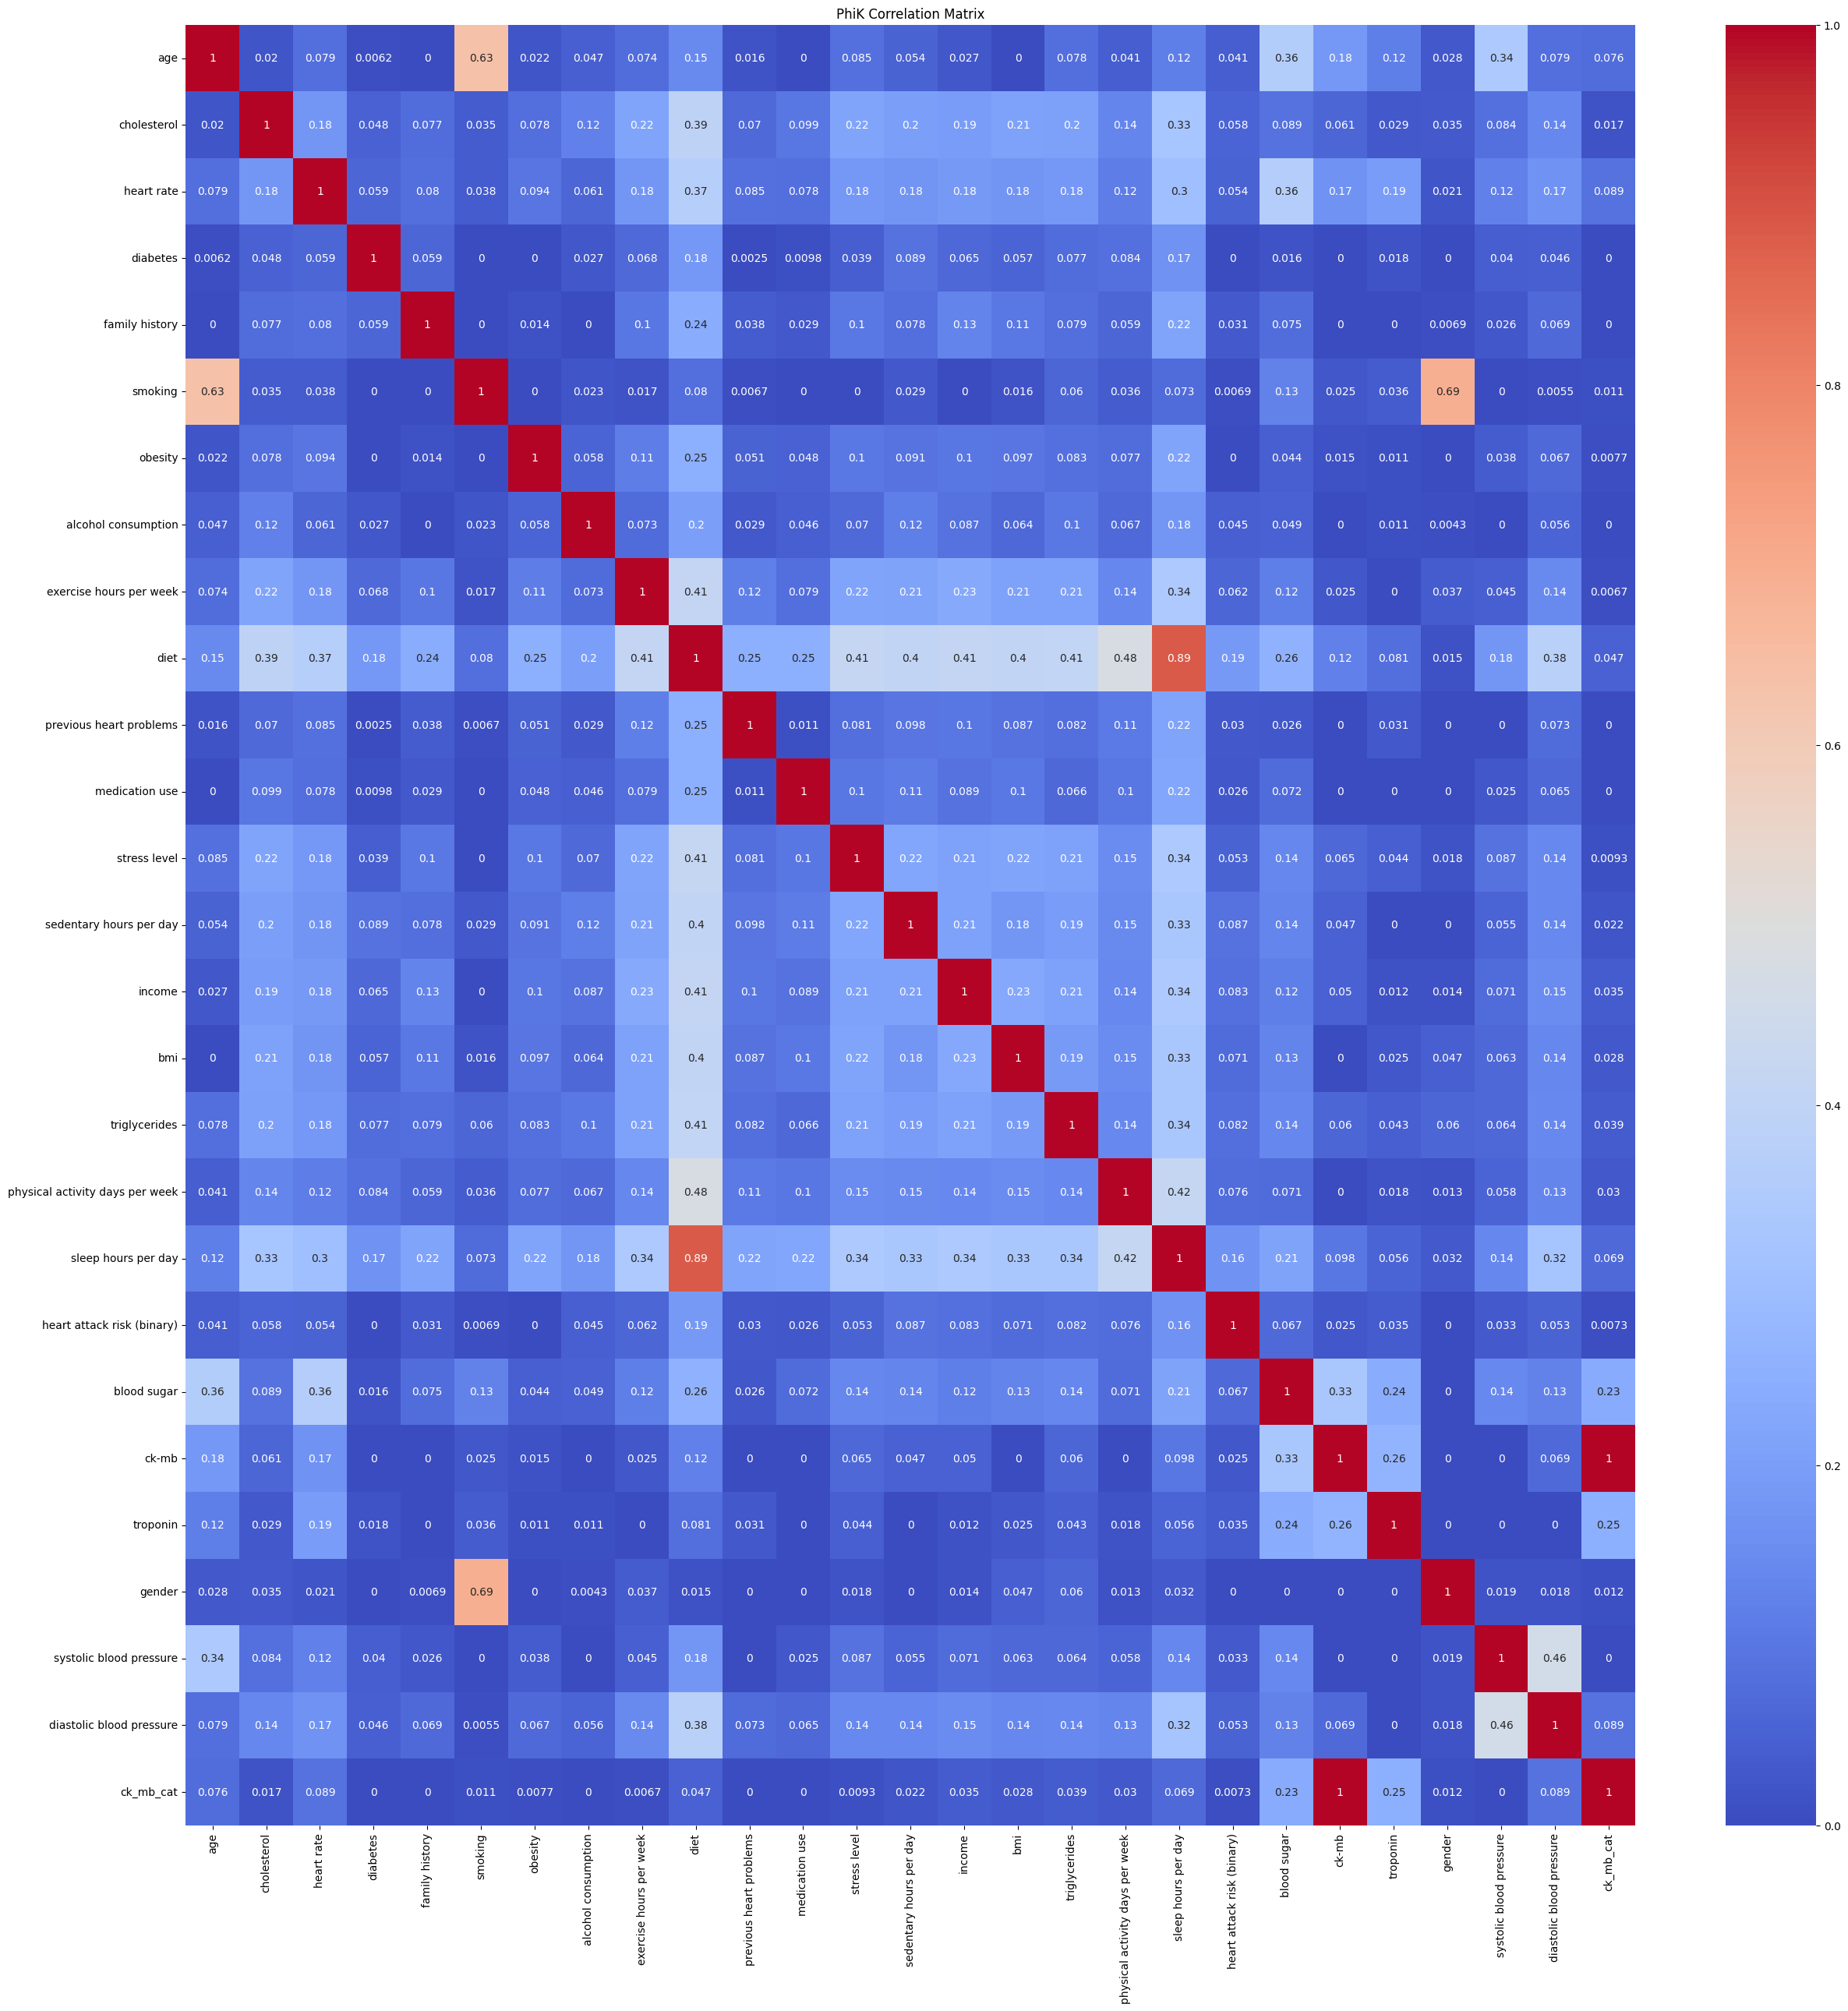

In [44]:

phik_matrix_preview = heart_train.drop(['id','unnamed: 0'], axis =1).phik_matrix(interval_cols= heart_train.columns)
plt.figure(figsize=(30, 30))  
sns.heatmap(phik_matrix_preview, annot=True, cmap='coolwarm')
plt.title('PhiK Correlation Matrix') 
plt.show() 

**Категоризация не принесла нужного результата, а только ухудшила. Удаление выброса позволило немного улучшить корреляцию. Из модели будут удалены признака с 0 корреляцией**

In [45]:
heart_train['heart rate'] = heart_train['heart rate'].fillna(heart_train['heart rate'].median())
heart_test['heart rate'] = heart_test['heart rate'].fillna(heart_test['heart rate'].median())

In [46]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed: 0                       966 non-null    int64  
 1   age                              966 non-null    float64
 2   cholesterol                      966 non-null    float64
 3   heart rate                       966 non-null    float64
 4   diabetes                         966 non-null    int32  
 5   family history                   966 non-null    int32  
 6   smoking                          966 non-null    int32  
 7   obesity                          966 non-null    int32  
 8   alcohol consumption              966 non-null    int32  
 9   exercise hours per week          966 non-null    float64
 10  diet                             966 non-null    int64  
 11  previous heart problems          966 non-null    int32  
 12  medication use        

In [47]:
# y_heart_train = heart_train['heart attack risk (binary)']
# X_heart_train = heart_train.drop(['unnamed: 0', 'diabetes','obesity','gender', 'id','ck_mb_cat','heart attack risk (binary)'], axis = 1)
# X_heart_test  = heart_test.drop(['unnamed: 0', 'diabetes','obesity','gender', 'id'], axis = 1)

In [48]:
y = heart_train['heart attack risk (binary)']
X= heart_train.drop(['unnamed: 0', 'id','ck_mb_cat','heart attack risk (binary)'], axis = 1)
X_heart_test  = heart_test.drop(['unnamed: 0',  'id'], axis = 1)

In [49]:

RANDOM_STATE = 42


X_heart_train, X_heart_val, y_heart_train, y_heart_val = train_test_split (X,y, test_size = 0.25,  random_state = RANDOM_STATE)

ohe_columns = [ 'diabetes','family history','smoking','obesity', 'alcohol consumption', 'previous heart problems',
'medication use', 'diet']

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
     
    ]
    
    )

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns)
    
    ], 
    remainder='passthrough',
   
)





pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),

    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))  
])

param_grid = [
 
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'models__min_samples_leaf': range(1,4),
        'models__min_samples_split': range(2,5)
        
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,5)
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']   
    },

 
 
     {
        'models': [SVC(random_state=RANDOM_STATE,probability=True)],
        'models__C': range(1,5)
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']
     },
         
        {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 200],  # Количество деревьев
        'models__learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
        'models__max_depth': range(2, 3),  # Глубина деревьев
        'models__min_samples_split': range(2, 5)
        # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]


randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_heart_train , y_heart_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['diabetes', 'family history',
                                                   'smoking', 'obesity',
                                                   'alcohol consumption',
            

In [50]:
grid_search = GridSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_heart_train, y_heart_train)
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['diabetes', 'family history',
                                                   'smoking', 'obesity',
                                                   'alcohol consumption',
            

In [51]:
X_heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              966 non-null    float64
 1   cholesterol                      966 non-null    float64
 2   heart rate                       966 non-null    float64
 3   diabetes                         966 non-null    int32  
 4   family history                   966 non-null    int32  
 5   smoking                          966 non-null    int32  
 6   obesity                          966 non-null    int32  
 7   alcohol consumption              966 non-null    int32  
 8   exercise hours per week          966 non-null    float64
 9   diet                             966 non-null    int64  
 10  previous heart problems          966 non-null    int32  
 11  medication use                   966 non-null    int32  
 12  stress level          

In [52]:
best_model = grid_search.best_estimator_
y_test_pred_val =  best_model.predict(X_heart_val)
y_test_pred_val = best_model.predict_proba(X_heart_val)[:, 1]
print(f'Метрика ROC-AUC на валидационной выборке: {roc_auc_score(y_heart_val, y_test_pred_val)}')


Метрика ROC-AUC на валидационной выборке: 0.5443653870734098


Метрика recall на валидационной выборки: 0.05986394557823129


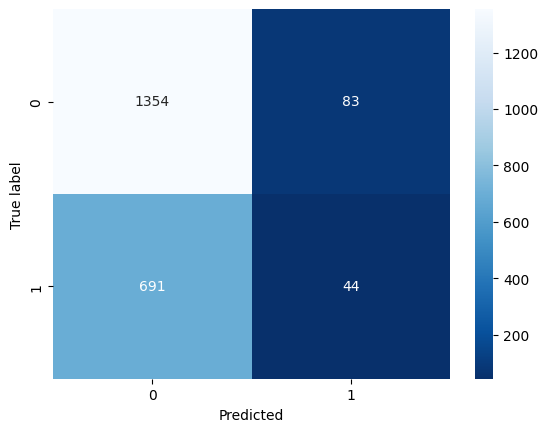

In [53]:
y_val_conf_matr = best_model.predict(X_heart_val)
print(f'Метрика recall на валидационной выборки: {recall_score(y_heart_val, y_val_conf_matr)}')

cm = confusion_matrix(y_heart_val, y_val_conf_matr )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 


In [59]:
print(f'Метрика f1 на валидационной выборки: {f1_score(y_heart_val, y_val_conf_matr)}')

Метрика f1 на валидационной выборки: 0.10208816705336426


**Ошибка второго рода слишком высокая. Я думаю для подобного рода классификации из всех метрик я бы выбрал метрику recall. Ведь если модель присвоить ошибочно класс 0, человек может и не знать и не будет думать о состоянии своего здоровья, что в свою оередь может оказать печальные последствия**

*Стоит уменьшить порог классификации*

0.9795918367346939
Метрика f1 на валидационной выборки: 0.5153901216893343
0.7945578231292517
Метрика f1 на валидационной выборки: 0.4965986394557823
0.28843537414965986
Метрика f1 на валидационной выборки: 0.3202416918429003
0.012244897959183673
Метрика f1 на валидационной выборки: 0.02346805736636245
0.004081632653061225
Метрика f1 на валидационной выборки: 0.00804289544235925
0.0013605442176870747
Метрика f1 на валидационной выборки: 0.0027100271002710027
0.0
Метрика f1 на валидационной выборки: 0.0


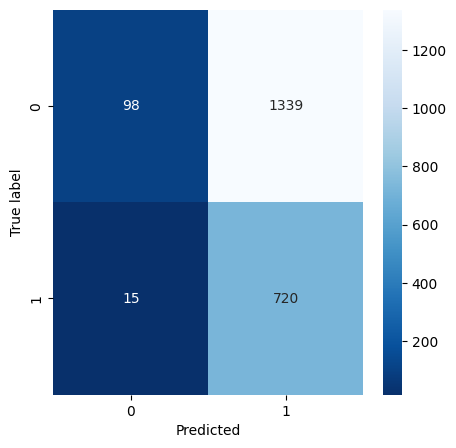

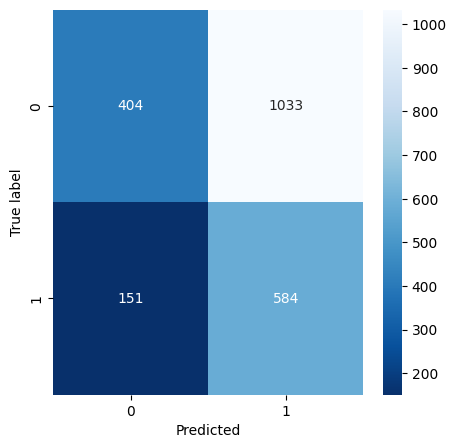

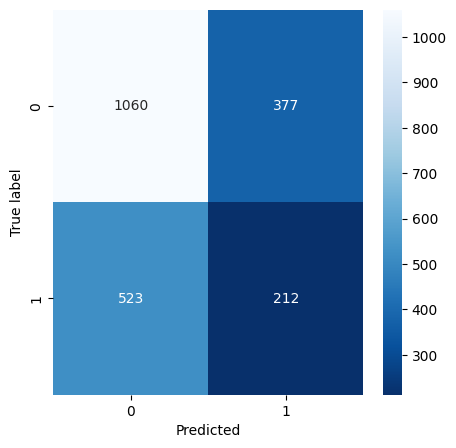

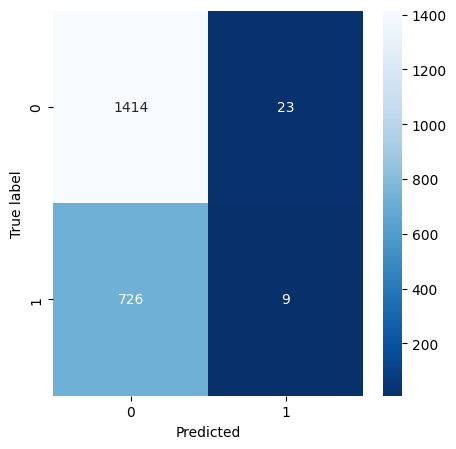

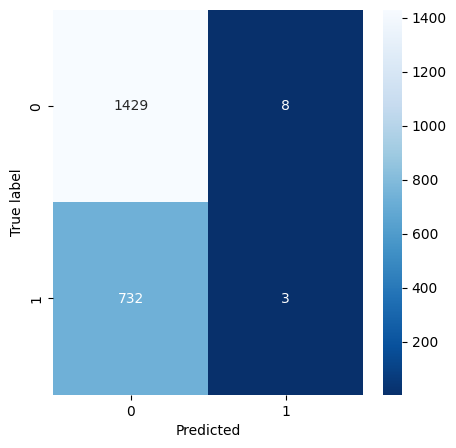

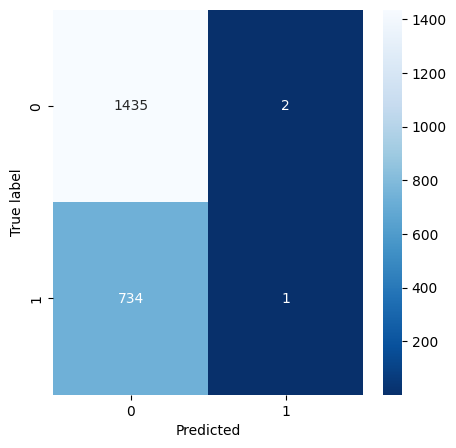

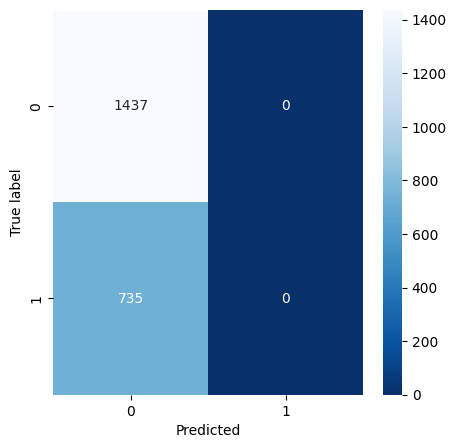

In [60]:
thresholds = [0.2,0.3,0.4, 0.6, 0.7, 0.8, 0.9]
for thresh in thresholds:
    y_pred = (y_test_pred_val >= thresh).astype('int')
    print(recall_score(y_heart_val,y_pred))
    print(f'Метрика f1 на валидационной выборки: {f1_score(y_heart_val,y_pred)}')
    cm = confusion_matrix(y_heart_val, y_pred )
    plt.figure(figsize=(5, 5)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted'); 

In [55]:
best_thresholds = 0.30
y_pred_custom = (y_test_pred_val >= best_thresholds).astype('int')
print(recall_score(y_heart_val,y_pred_custom))

0.7945578231292517


**Делаем предсказание целевой переменной для X_heart_test с выбранным порогом**

In [56]:
y_pred_final = best_model.predict_proba(X_heart_test)[:, 1]
y_pred_final_final = (y_pred_final >= best_thresholds).astype('int')

In [57]:
y_pred_final_final

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,

**Учитывая специфику данных, которые наверняка промаркированы неверно, удалось построить модель с уменьшением порога и увеличение качество метрики recall. Позиция выбора ключевой метрики остается прежней. Я выбираю порог в 30%.**

**Общий вывод**
1) Полученные данные изначально были отмасштабированы. Думаю MinMaxScaler
2) Проведен исследовательский анализ данных
3) Проведен корреляционный анализ. Корреляция не логична. Практически никакой взаимосвязи с целевым признаком. Есть подозрение, что целевой признак перепутан и был промаркирован неверным столбцом. Думаю подобные вопросы нужно задавать инженеру данных
4) В пайплайне признаки категориальные были закодированы OneCoder
5) Лучшая модель и параметры: GradientBoostingClassifier(learning_rate=0.2, max_depth=2,n_estimators=200)
6) Я создал валидационную выборку, чтобы оценить качество модели и ее предсказания.
7) Я выбрал метрику качества recall и опустил порог принятие решения. Что уменьшило ошибки второго рода.
8) Многие признаки не коллерируют с целевым. В результате разных тестов, добавления и удаления признаков, модель не показывала лучших результатов. В итоге я принял решение их закодировать, это показало наилучшие результаты


Я не могу рекомендовать модель к использованию, так как данные явно некорректные, или если тольок заказчик не готов принимать всех потенциальных пациентов с риском инфаркта. Я уверен, что получив корректные данные, метрика качества возрастет без изменения порога
                                           0